## PHYS 249 Assignment #8:  Non-Linear Equations & Differential Equations

(See units 17-20)

### 1) Roots of a Polynomial
(based on Newman 6.15 - chapter 6, p.273 of the text for details.)

Consider the sixth-order polynomial

$$P(x) = 924x^6 − 2772x^5 + 3150x^4 − 1680x^3 + 420x^2 − 42x + 1$$


**a)** Make a plot of P(x) from $x=0$ to $x=1$ and estimate roughly (to within 0.01) where its six roots are.


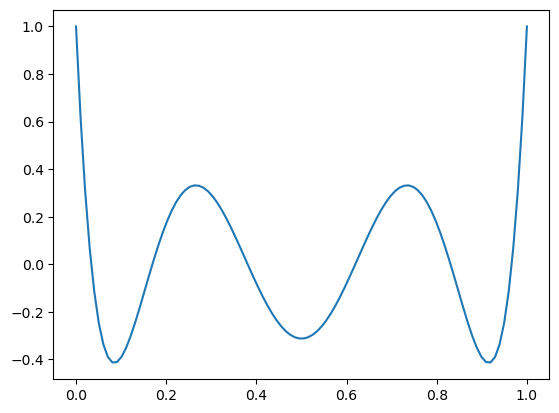

In [6]:
from matplotlib.pyplot import *
import numpy as np

x = np.linspace(0,1,100)
y=[]
for i in x:
    y.append(924*(i**6) - 2772*(i**5) + 3150*(i**4) - 1680*(i**3) + 420*(i**2) - 42*i + 1)
    
plot(x,y)
show()

#from this graph i would estimate the roots are at 0.03, 0.18, 0.39, 0.62, 0.83, 0.97

**b)** Write a Python program to calculate the exact value of the six roots to ten decimal places accuracy, using Newton’s method.

In [72]:
from sympy import *

def func(x):
    return 924*(x**6) - 2772*(x**5) + 3150*(x**4) - 1680*(x**3) + 420*(x**2) - 42*x + 1
            

def newt(f, x0, threshold, maxiter):
    #something makes error > 0 and so propogation goes wrong way, don't know what's wrong
    flag = False
    N=1
    ff = lambdify(x, f)
    fprime = f.diff(x)
    fp = lambdify(x, fprime)
    fdprime = fprime.diff(x)
    fpp = lambdify(x,fdprime)
    xval = x0
    for j in range (0,maxiter):
        xnext = xval - ff(xval)/fp(xval)
        if flag == False:
            e0 = (0.5*(xnext-xval)**2)*(fpp(xval)/fp(xval))
            if e0 < 1e-10:
                return xnext
            else: flag = True
        if flag == True:
            e = e0**(2**N)
            N+=1
            if e < 1e-10:
                return xnext
    return None

x = Symbol('x')
num = 6
start = 0
rootlist = []
for i in range(0,6):
    root = newt(func(x), start, 1e-10, 100)
    if root != None:
        rootlist.append(root)
    start = root + 0.16 #here, doesn't work without +0.16 (chosen because 1/6), why?
        
print(rootlist)
    

[0.023809523809523808, 0.16862143367781138, 0.38910288579768587, 0.6523930004237144, 0.8319720820665298, 0.9726033943847857]


### 2) A 2D Simple Bouncing Ball

Consider a ball bouncing around a 2D rectangular box, with horizontal/vertical sides at $(x_0,x_1, y_0,y_1)$. 

**a)** To begin with, we will ignore gravtiy and any other forces, and assume that the ball simply moves at constant velocity without acceleration/deceleration, until it hits a wall. At that point, the velocity component normal to the wall is reversed, while the other component remains unchanged.

The code stub below sets up the problem and evolves the ball forward with time, but includes the condition for only one wall.

Add the conditions for the other walls, run the code and plot the motion of the ball.


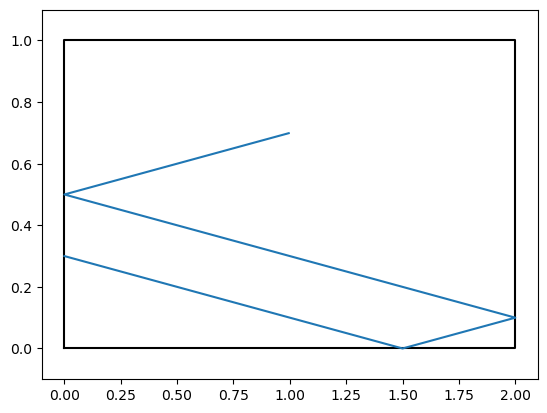

In [7]:
# import stuff
from numpy import array, arange
from pylab import plot, show, xlim, ylim

#note we will assume S.I. units - meters, seconds etc. - for all quantities

# define evolution equations
def deriv(P):
    x = P[0]
    y = P[1]
    vx = P[2]
    vy = P[3]
    ax = 0.0
    ay = 0.0
    return array([vx,vy,ax,ay],float)

# setup integration time and time resolution
t0 = 0.0
t1 = 10.0
N = 1000
dt = (t1-t0)/float(N)
tpoints = arange(t0,t1,dt)

# set up boundary conditions
# walls at x0, x1, y0, y1
x0 = 0.0
x1 = 2.0
y0 = 0.0
y1 = 1.0

# set up intial conditions
p = array([0.0, 0.3, 0.5, -0.1],float)

xpoints = []
ypoints = []

# iterate through steps
# using Euler integration
for t in tpoints:
        xpoints.append(p[0])
        ypoints.append(p[1])
        p += dt*deriv(p)
        # reflect off walls
        if p[0] < x0:
            p[0] = 2.0*x0 - p[0]
            p[2] = - p[2]
            # fill in other walls here
        if p[0] > x1:
            p[0] = 2*x1 - p[0]
            p[2] = - p[2]
        if p[1] < y0:
            p[1] = 2.0*y0 - p[1]
            p[3] = - p[3]
        if p[1] > y1:
            p[1] = 2*y1 - p[1]
            p[3] = - p[3]
            
# show results - draw box
xlim(x0-0.1,x1+0.1)
ylim(y0-0.1,y1+0.1)
boxx = [x0,x1,x1,x0,x0]
boxy = [y0,y0,y1,y1,y0]
plot(boxx,boxy, 'k-')
# now draw path and show it

#draw path
plot(xpoints,ypoints)
show()


**b)** Now add acceleration due to gravity, with the usual gravitational constant g = 9.81 downwards. The motion should become more realistic.

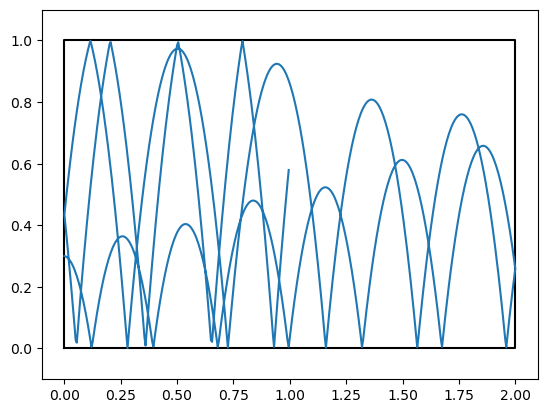

In [27]:
# import stuff
from numpy import array, arange
from pylab import plot, show, xlim, ylim

#note we will assume S.I. units - meters, seconds etc. - for all quantities

# define evolution equations
def deriv(P):
    x = P[0]
    y = P[1]
    vx = P[2]
    vy = P[3]
    ax = 0.0
    ay = -9.81
    return array([vx,vy,ax,ay],float)

# setup integration time and time resolution
t0 = 0.0
t1 = 10.0
N = 1000
dt = (t1-t0)/float(N)
tpoints = arange(t0,t1,dt)

# set up boundary conditions
# walls at x0, x1, y0, y1
x0 = 0.0
x1 = 2.0
y0 = 0.0
y1 = 1.0

# set up intial conditions
p = array([0.0, 0.3, 0.5, -0.1],float)

xpoints = []
ypoints = []

# iterate through steps
# using Euler integration
for t in tpoints:
        xpoints.append(p[0])
        ypoints.append(p[1])
        p += dt*deriv(p)
        # reflect off walls
        if p[0] < x0:
            p[0] = 2.0*x0 - p[0]
            p[2] = - p[2]
            # fill in other walls here
        if p[0] > x1:
            p[0] = 2*x1 - p[0]
            p[2] = - p[2]
        if p[1] < y0:
            p[1] = 2.0*y0 - p[1]
            p[3] = - p[3]
        if p[1] > y1:
            p[1] = 2*y1 - p[1]
            p[3] = - p[3]
            
# show results - draw box
xlim(x0-0.1,x1+0.1)
ylim(y0-0.1,y1+0.1)
boxx = [x0,x1,x1,x0,x0]
boxy = [y0,y0,y1,y1,y0]
plot(boxx,boxy, 'k-')
# now draw path and show it

#draw path
plot(xpoints,ypoints)
show()


**c)** Now make a second version of the code that uses RK4 integration rather than Euler. 

The lines of code for RK4 might look something like:

        k1 = dt*deriv(p, t)
        k2 = dt*deriv(p + 0.5*k1,t+0.5*dt)
        k3 = dt*deriv(p + 0.5*k2,t+0.5*dt)
        k4 = dt*deriv(p + k3,t+dt)
        p += (k1+2*k2+2*k3+k4)/6.0

Run the Euler code and the RK4 code, check energy conservation for the two by plotting versus time the total energy per unit mass:

$$E/m = P/m + K/m = yg + \frac{1}{2} v^2$$. 

Adjust the number of timesteps until energy is conserved to 10\% from $t = 0$ to $t = 10$.


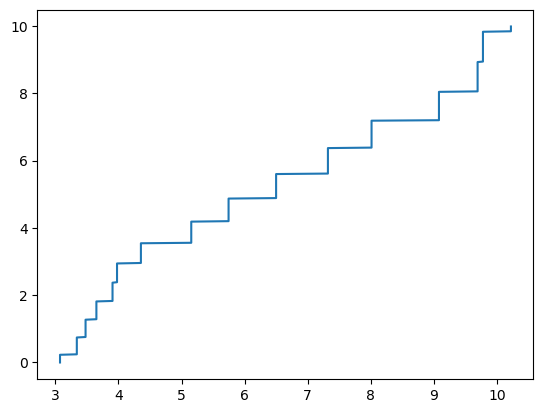

In [54]:
# import stuff
from numpy import array, arange
from pylab import plot, show, xlim, ylim
from math import *

#note we will assume S.I. units - meters, seconds etc. - for all quantities

# define evolution equations
def deriv(P, t):
    x = P[0]
    y = P[1]
    vx = P[2]
    vy = P[3]
    ax = 0.0
    ay = -9.81
    return array([vx,vy,ax,ay],float)

# setup integration time and time resolution
t0 = 0.0
t1 = 10.0
N = 700
dt = (t1-t0)/float(N)
tpoints = arange(t0,t1,dt)

# set up boundary conditions
# walls at x0, x1, y0, y1
x0 = 0.0
x1 = 2.0
y0 = 0.0
y1 = 1.0

# set up intial conditions
p = array([0.0, 0.3, 0.5, -0.1],float)

xpoints = []
ypoints = []
Epoints = []

# iterate through steps
# using Euler integration
for t in tpoints:
    velo = sqrt(p[2]**2 + p[3]**2)
    xpoints.append(p[0])
    ypoints.append(p[1])
    Epoints.append(p[1]*(9.81) + 0.5*(p[2]**2 + p[3]**2))
    k1 = dt*deriv(p, t)
    k2 = dt*deriv(p + 0.5*k1,t+0.5*dt)
    k3 = dt*deriv(p + 0.5*k2,t+0.5*dt)
    k4 = dt*deriv(p + k3,t+dt)
    p += (k1+2*k2+2*k3+k4)/6.0
    if p[0] < x0:
            p[0] = 2.0*x0 - p[0]
            p[2] = - p[2]
            # fill in other walls here
    if p[0] > x1:
        p[0] = 2*x1 - p[0]
        p[2] = - p[2]
    if p[1] < y0:
        p[1] = 2.0*y0 - p[1]
        p[3] = - p[3]
    if p[1] > y1:
        p[1] = 2*y1 - p[1]
        p[3] = - p[3]

plot(Epoints, tpoints)
show()

**d)** Finally, add realistic enery dissipation to the code, assuming that the norm of the velocity is reduced by 5\% at each bounce.


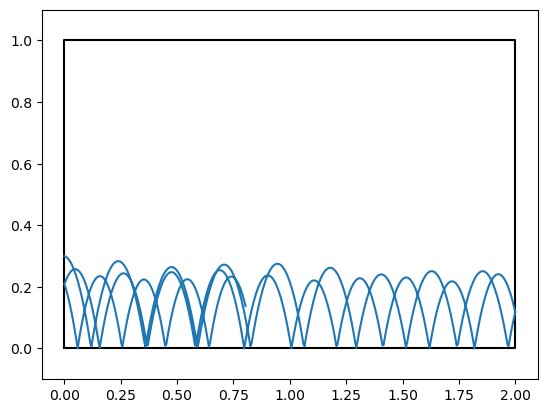

In [55]:
# import stuff
from numpy import array, arange
from pylab import plot, show, xlim, ylim
from math import *

#note we will assume S.I. units - meters, seconds etc. - for all quantities

# define evolution equations
def deriv(P, t):
    x = P[0]
    y = P[1]
    vx = P[2]
    vy = P[3]
    ax = 0.0
    ay = -9.81
    return array([vx,vy,ax,ay],float)

# setup integration time and time resolution
t0 = 0.0
t1 = 10.0
N = 1000
dt = (t1-t0)/float(N)
tpoints = arange(t0,t1,dt)

# set up boundary conditions
# walls at x0, x1, y0, y1
x0 = 0.0
x1 = 2.0
y0 = 0.0
y1 = 1.0

# set up intial conditions
p = array([0.0, 0.3, 0.5, -0.1],float)

xpoints = []
ypoints = []
Epoints = []

# iterate through steps
# using Euler integration
for t in tpoints:
    velo = sqrt(p[2]**2 + p[3]**2)
    xpoints.append(p[0])
    ypoints.append(p[1])
    Epoints.append(p[1]*(9.81) + 0.5*velo)
    k1 = dt*deriv(p, t)
    k2 = dt*deriv(p + 0.5*k1,t+0.5*dt)
    k3 = dt*deriv(p + 0.5*k2,t+0.5*dt)
    k4 = dt*deriv(p + k3,t+dt)
    p += (k1+2*k2+2*k3+k4)/6.0
    if p[0] < x0:
        p[0] = 2.0*x0 - p[0]
        p[2] = - (p[2] - (0.05*p[2]))
            # fill in other walls here
    if p[0] > x1:
        p[0] = 2*x1 - p[0]
        p[2] = - (p[2] - (0.05*p[2]))
    if p[1] < y0:
        p[1] = 2.0*y0 - p[1]
        p[3] = - (p[3] - (0.05*p[3]))
    if p[1] > y1:
        p[1] = 2*y1 - p[1]
        p[3] = - (p[3] - (0.05*p[3]))
        
# show results - draw box
xlim(x0-0.1,x1+0.1)
ylim(y0-0.1,y1+0.1)
boxx = [x0,x1,x1,x0,x0]
boxy = [y0,y0,y1,y1,y0]
plot(boxx,boxy, 'k-')
# now draw path and show it

#draw path
plot(xpoints,ypoints)
show()

In [ ]:
s